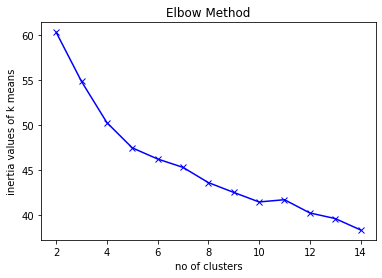

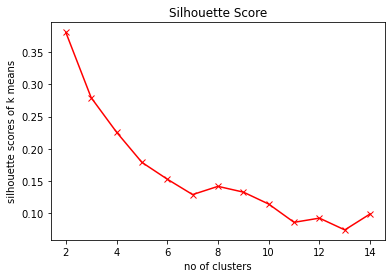

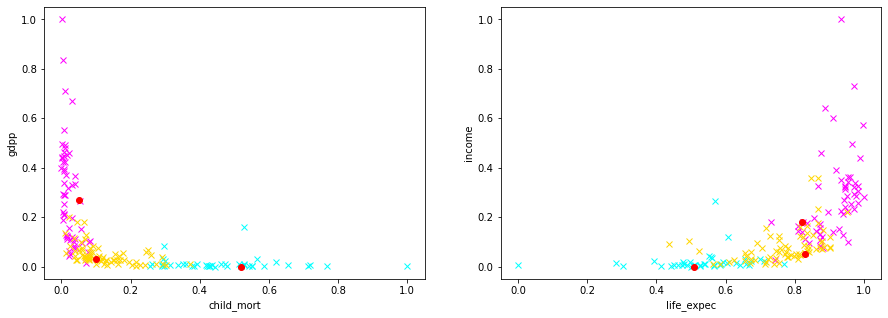

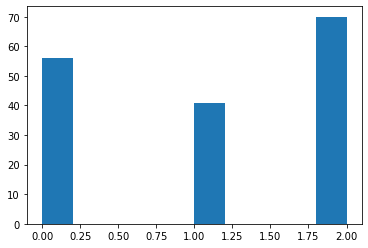

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
np.set_printoptions(suppress=True)
df=pd.read_csv('C:\Python\Assignments\MLAssignment\Country_data.csv')
df.set_index("country",
              inplace = True)
RS=MinMaxScaler()
colors=['fuchsia','aqua','gold','brown','gray','black','r','b','g']
for x in df.columns[0:9]:
    RS.fit(np.array(df[x]).reshape(-1,1))
    df[x]=RS.transform(np.array(df[x]).reshape(-1,1))
    df[x].round(2)
def plot_scores():
    SSO={'silhouette_score':[],'elbow':[]}
    for i in range(2,15):
        kmedoid=KMedoids(n_clusters=i)
        a=kmedoid.fit_predict(df[df.columns[0:9]])
        SSO['elbow'].append(kmedoid.inertia_)
        SSO['silhouette_score'].append(silhouette_score(df[df.columns[0:9]],a,metric='manhattan'))
    plt.title("Elbow Method")
    plt.plot(list(range(2,15)),SSO['elbow'],marker='x',color='b',label='elbow')
    plt.xlabel('no of clusters')
    plt.ylabel('inertia values of k means')
    plt.show()
    plt.title("Silhouette Score")
    plt.plot(list(range(2,15)),SSO['silhouette_score'],marker='x',color='r',label='silhouette_score')
    plt.xlabel('no of clusters')
    plt.ylabel('silhouette scores of k means')
    plt.show()
plot_scores()

def kmedoids_library():
    Kmedoids=KMedoids(n_clusters=3)
    Kmedoids.fit(df[df.columns[0:9]])
    clusters_list=Kmedoids.predict(df[df.columns[0:9]])
    centroid=Kmedoids.cluster_centers_.round(2)

    return clusters_list,centroid
clusters_list,centroid=kmedoids_library()
number_of_clusters=3


def plot():
    axs=[]
    df['cluster']=clusters_list
    fig, axs=plt.subplots(1,2,figsize=(15,5))
    cluster=[0,1,2]
    for k in range(number_of_clusters):
        axs[0].plot(df[df['cluster']==cluster[k]]['child_mort'],df[df['cluster']==cluster[k]]['gdpp'],'x',color=colors[k])
        axs[1].plot(df[df['cluster']==cluster[k]]['life_expec'],df[df['cluster']==cluster[k]]['income'],'x',color=colors[k])
    axs[0].plot(centroid[:,0],centroid[:,8],'o',color='r')
    axs[1].plot(centroid[:,6],centroid[:,4],'o',color='r')
    axs[0].set_xlabel('child_mort')
    axs[0].set_ylabel('gdpp')
    axs[1].set_xlabel('life_expec')
    axs[1].set_ylabel('income')
    plt.show()
    plt.hist(np.sort(df['cluster']))
    plt.show()
plot()


child_mort           92.1
exports              13.5
health                2.2
imports              19.4
income               4280
inflation            10.9
life_expec           65.3
total_fer            3.85
gdpp                 1040
status of nations       c
min                     c
Name: Pakistan, dtype: object